               sl          sw          pl          pw      target
count  105.000000  105.000000  105.000000  105.000000  105.000000
mean     5.893333    3.044762    3.828571    1.227619    1.047619
std      0.876868    0.441366    1.804573    0.780100    0.836441
min      4.300000    2.000000    1.100000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.400000    1.300000    1.000000
75%      6.500000    3.300000    5.200000    1.900000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


c:\Users\smoll_zoa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


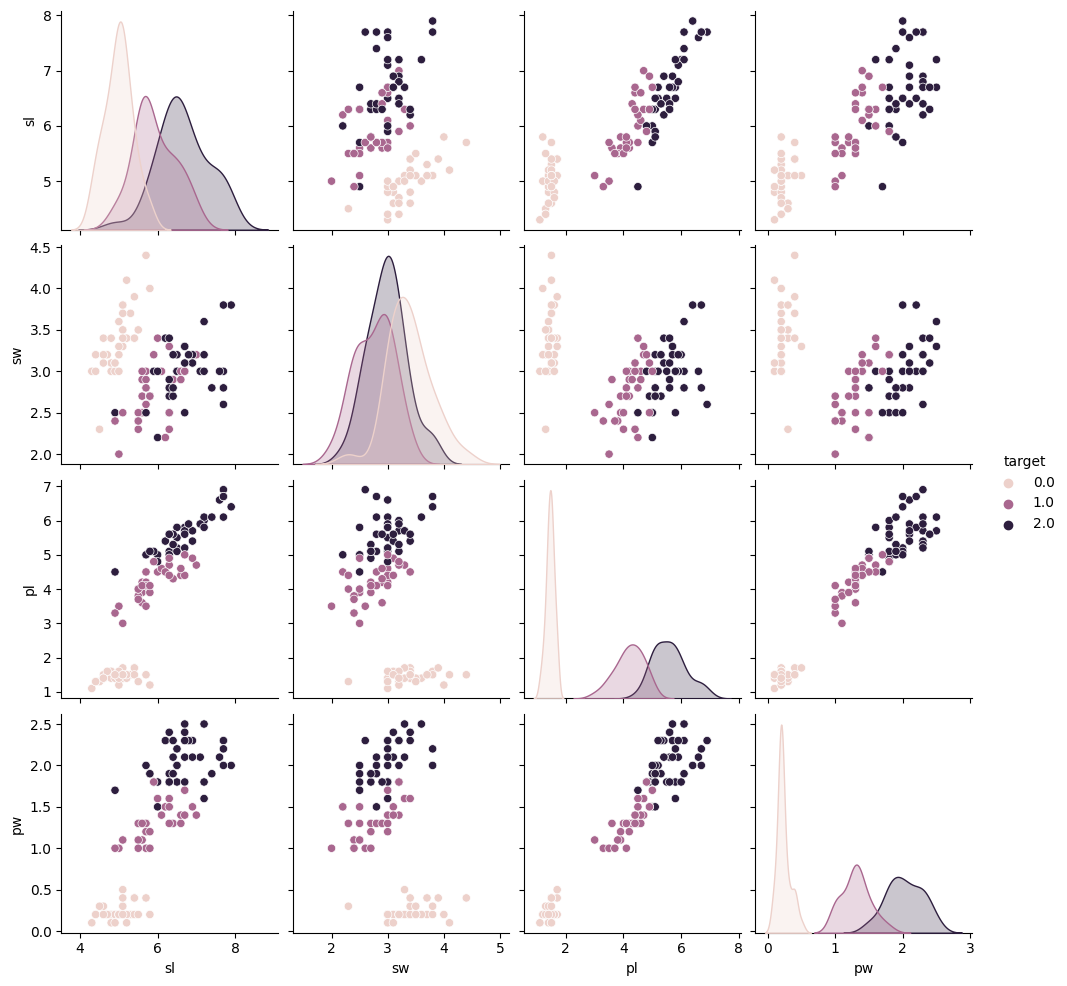

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

iris = load_iris()
data_pd = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=['sl', 'sw', 'pl', 'pw', 'target'])
data_train, data_test = train_test_split(data_pd, test_size=0.3, random_state=0)
data_x = data_train.iloc[:,:-1]
data_target = data_train.iloc[:,-1]

print(data_train.describe())
sns.pairplot(data_train, hue='target')
plt.show()

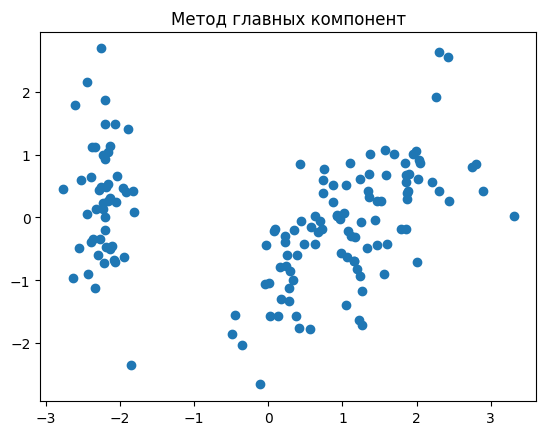

Информативность: 95.81%


In [13]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_x)
pca = decomposition.PCA()
x_pca = pca.fit_transform(data_scaled)

data_delta = pca.explained_variance_ratio_

plt.scatter(x_pca[:,0], x_pca[:,1])
plt.title('Метод главных компонент')
plt.show()
print(f'Информативность: {100*sum(data_delta[:2]):.2f}%')

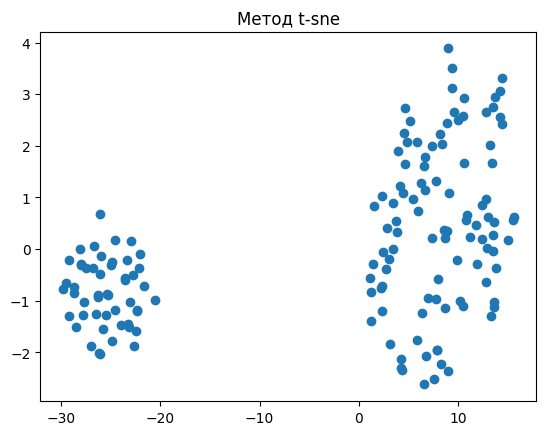

In [12]:
from sklearn.manifold import TSNE

t_sne = TSNE()
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data_scaled)
plt.scatter(tsne_data[:,0], tsne_data[:,1])
plt.title('Метод t-sne')
plt.show()